## Correlation and Experimental Design

In this chapter, you'll learn how to quantify the strength of a linear relationship between two variables, and explore how confounding variables can affect the relationship between two other variables. You'll also see how a study’s design can influence its results, change how the data should be analyzed, and potentially affect the reliability of your conclusions.

### Relationships between variables
In this chapter, you'll be working with a dataset world_happiness containing results from the 2019 World Happiness Report. The report scores various countries based on how happy people in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

In this exercise, you'll examine the relationship between a country's life expectancy (life_exp) and happiness score (happiness_score) both visually and quantitatively. Both dplyr and ggplot2 are loaded and world_happiness is available.

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

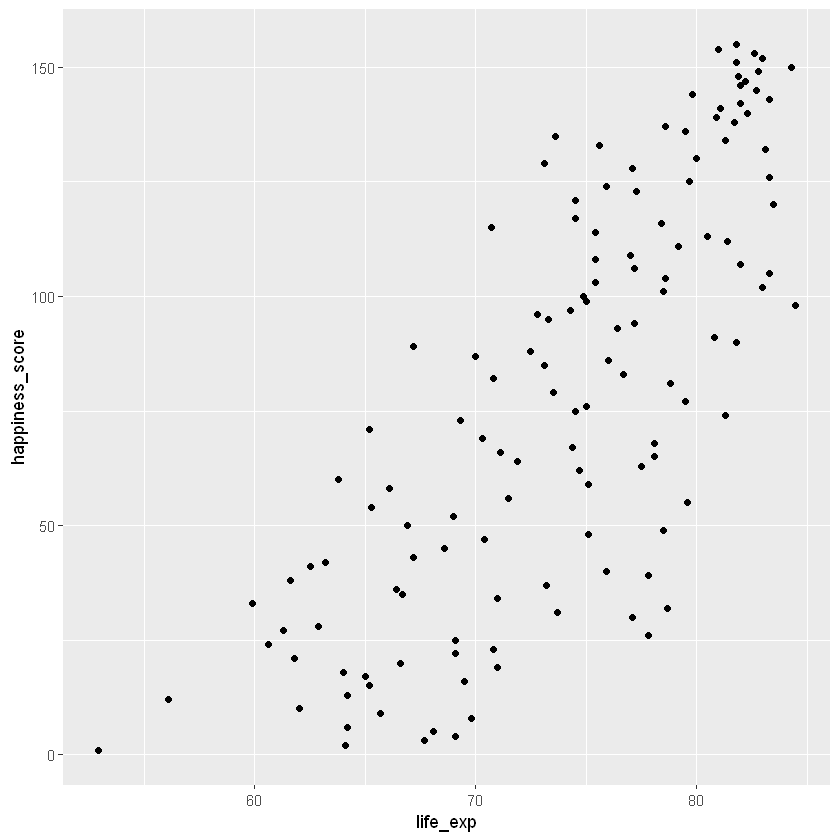

In [1]:
library(dplyr)
library(ggplot2)

world_happiness = readRDS("world_happiness_sugar.rds")

# Create a scatterplot of happiness_score vs. life_exp
ggplot(world_happiness, aes( life_exp, happiness_score)) + geom_point()


`geom_smooth()` using formula 'y ~ x'


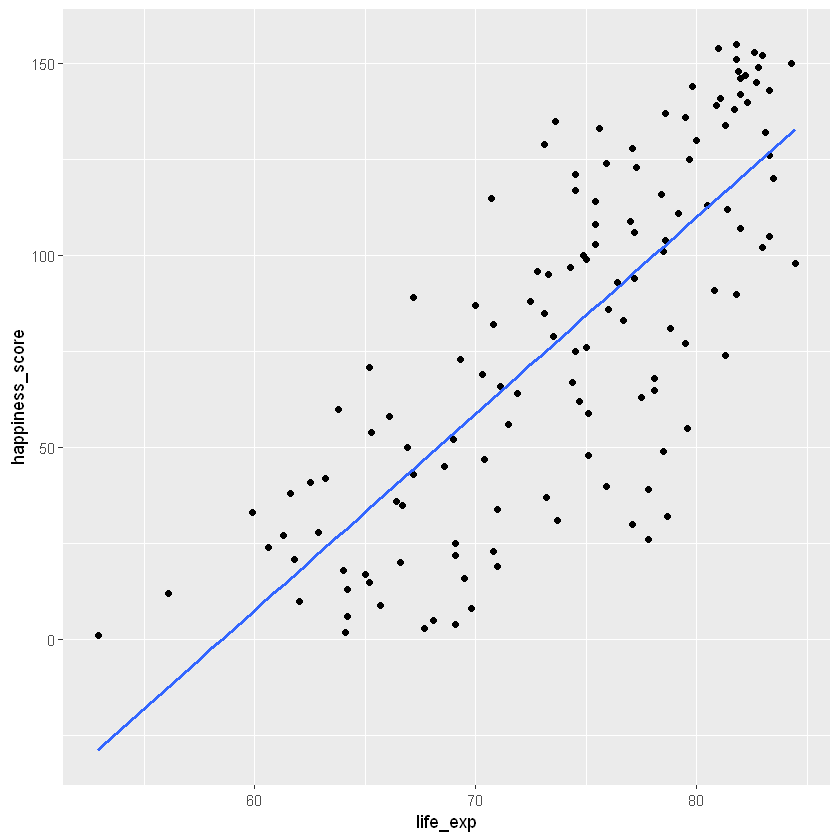

In [2]:
# Add a linear trendline to scatterplot
ggplot(world_happiness, aes(life_exp, happiness_score)) +
  geom_point() + geom_smooth(method = "lm", se = FALSE)

In [4]:
# Correlation between life_exp and happiness_score
cor(world_happiness$life_exp, world_happiness$happiness_score)

[1] 0.7737615

### What can't correlation measure?
While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect. In this exercise, you'll explore one of the caveats of the correlation coefficient by examining the relationship between a country's GDP per capita (gdp_per_cap) and happiness score.

[1] 0.7235027

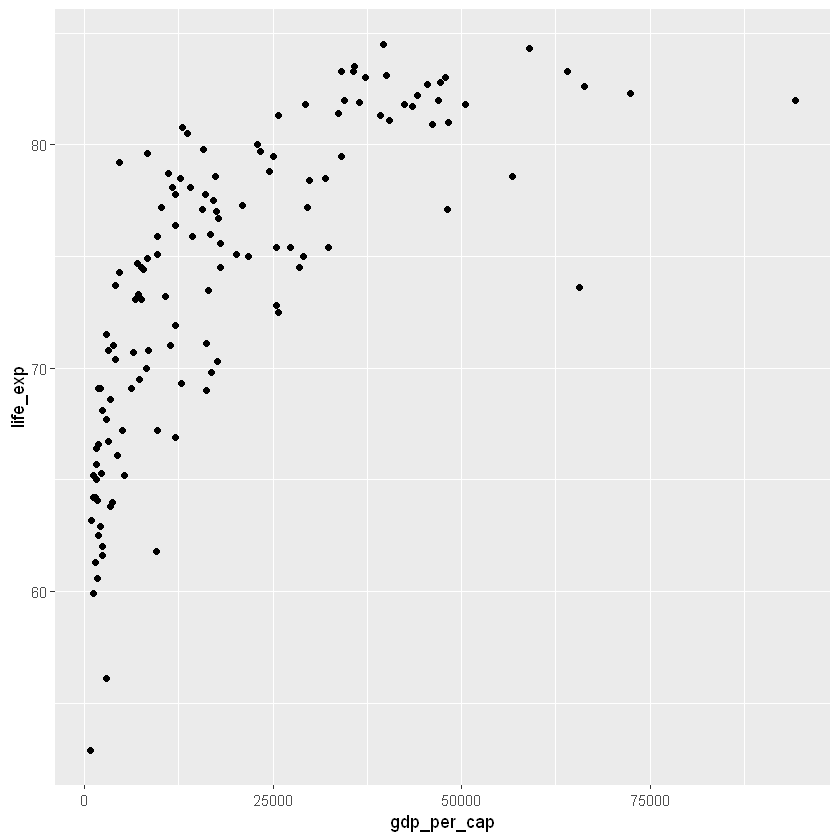

In [6]:
# Scatterplot of gdp_per_cap and life_exp
ggplot(world_happiness, aes(gdp_per_cap, life_exp))+ geom_point()

# Correlation between gdp_per_cap and life_exp
cor(world_happiness$gdp_per_cap, world_happiness$life_exp)

### Transforming variables
When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. In this exercise, you'll perform a transformation yourself.

[1] 0.7601853

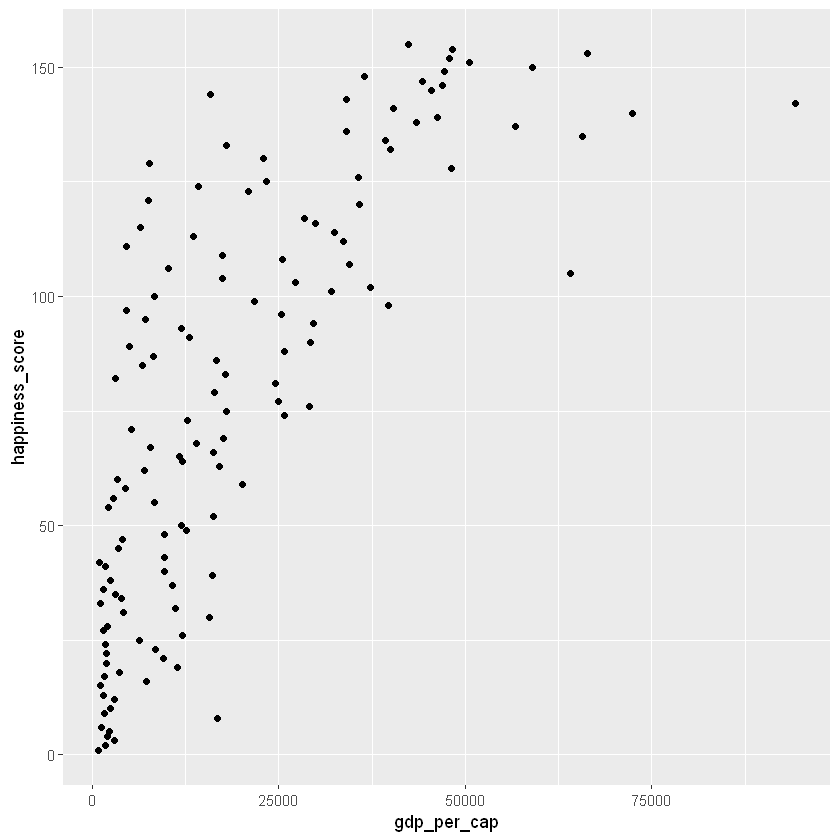

In [7]:
# Scatterplot of happiness_score vs. gdp_per_cap
ggplot(world_happiness, aes(gdp_per_cap,happiness_score))+ geom_point()

# Calculate correlation
cor(world_happiness$gdp_per_cap, world_happiness$happiness_score)

Warning message:
"Use of `world_happiness$happiness_score` is discouraged. Use `happiness_score` instead."

[1] 0.7965484

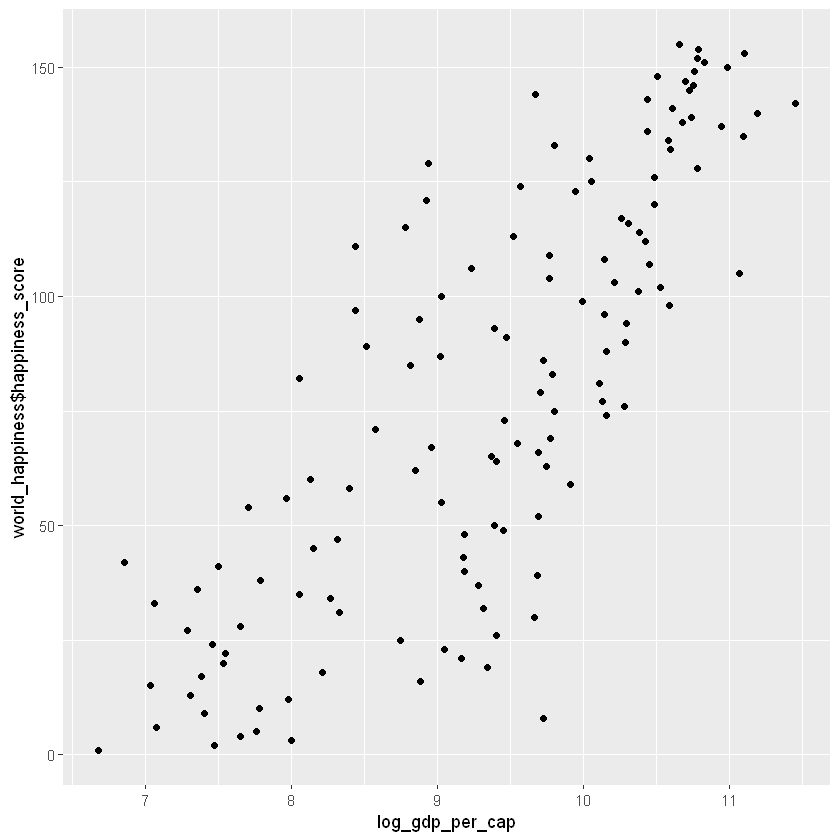

In [8]:
# Create log_gdp_per_cap column
world_happiness <- world_happiness %>%
  mutate(log_gdp_per_cap = log(gdp_per_cap))

# Scatterplot of log_gdp_per_cap vs. happiness_score
ggplot(world_happiness, aes(log_gdp_per_cap, world_happiness$happiness_score)) +
  geom_point()

# Calculate correlation
cor(world_happiness$log_gdp_per_cap, world_happiness$happiness_score)

### Does sugar improve happiness?
A new column has been added to world_happiness called grams_sugar_per_day, which contains the average amount of sugar eaten per person per day in each country. In this exercise, you'll examine the effect of a country's average sugar consumption on its happiness score.

[1] 0.69391

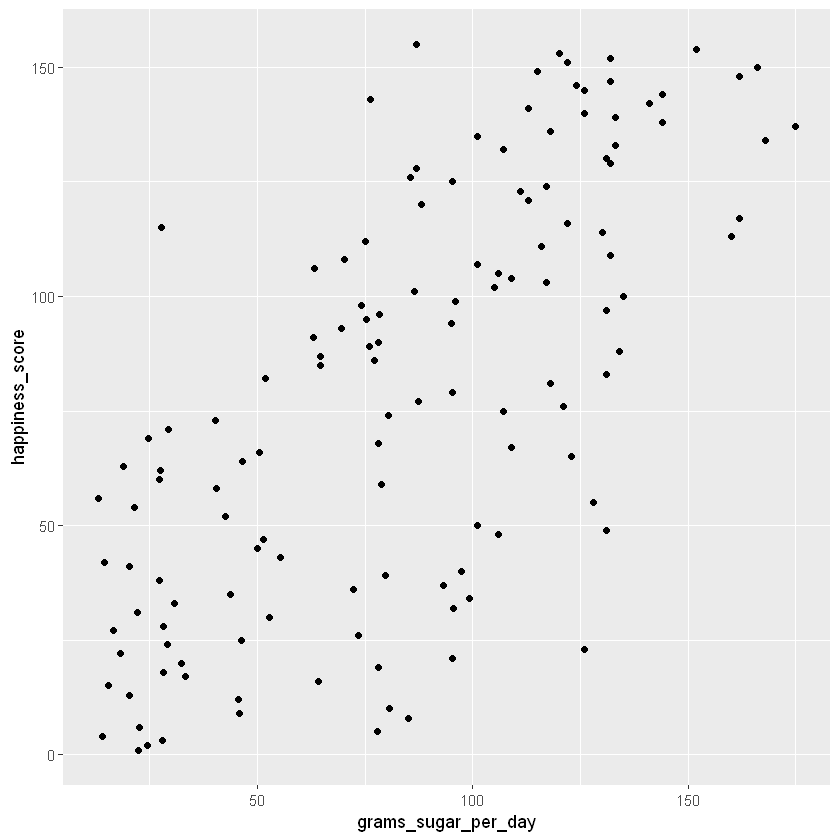

In [9]:
# Scatterplot of grams_sugar_per_day and happiness_score
ggplot(world_happiness, aes(grams_sugar_per_day,happiness_score)) +
  geom_point()
# Correlation between grams_sugar_per_day and happiness_score
cor(world_happiness$grams_sugar_per_day, world_happiness$happiness_score)